In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats
import statsmodels.api as sm
from datetime import date
from sklearn import metrics
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [2]:
ames = pd.read_csv('./frames/training.csv')
ames_raw = pd.read_csv('./data/train.csv') # easier with categorical values

In [3]:
mpl.rcParams['figure.dpi']= 200
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
plt.style.use('seaborn-colorblind')
sns.set_style('ticks')
set_matplotlib_formats('png')

# EDA

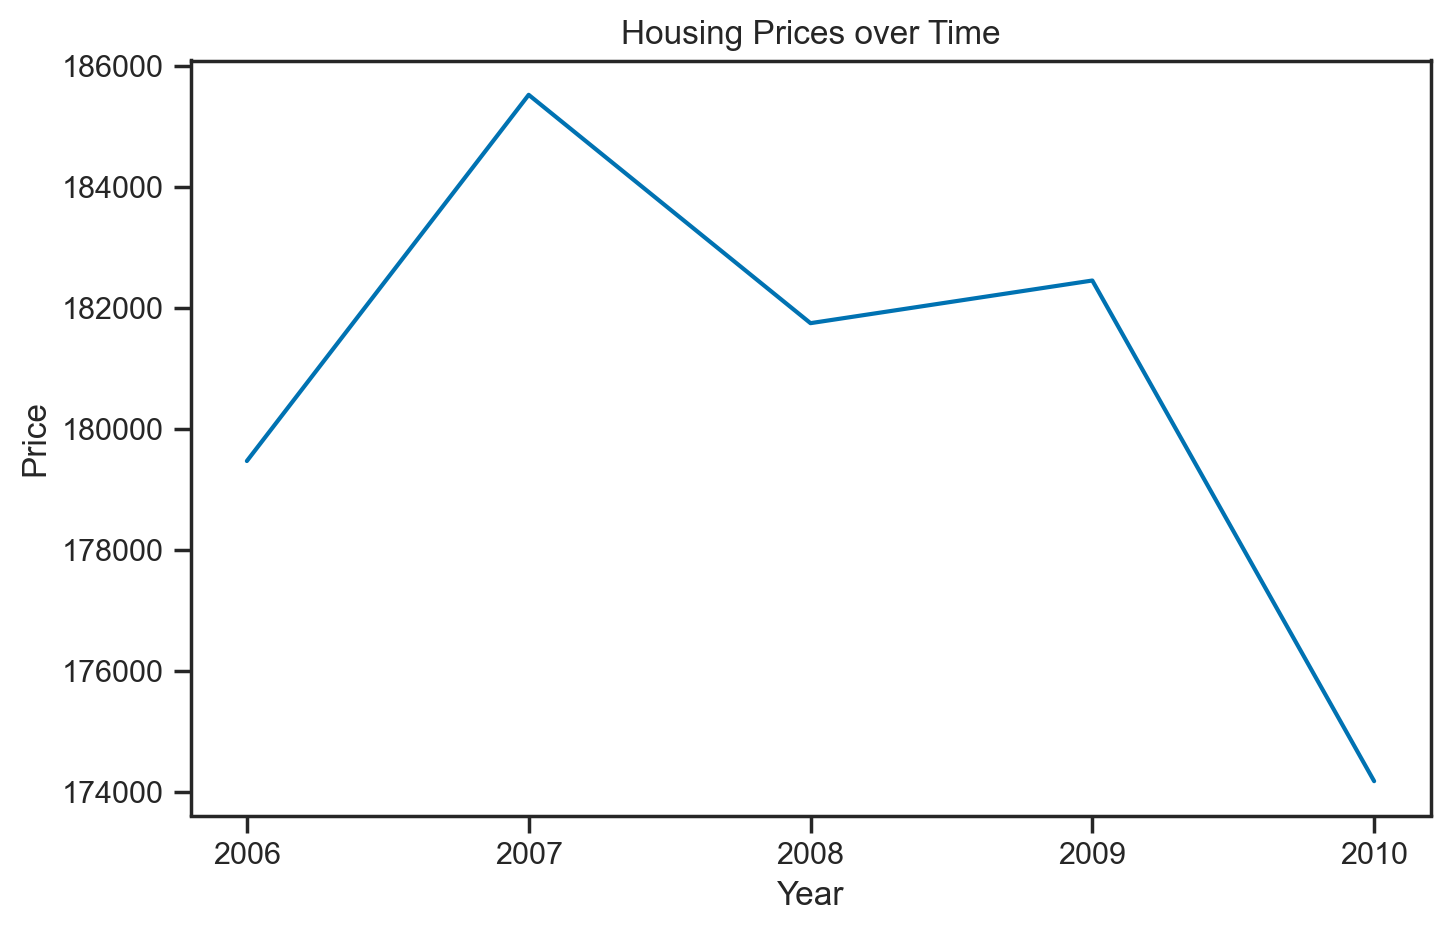

In [4]:
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.plot(ames.groupby('Yr Sold')['SalePrice'].mean())
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.title('Housing Prices over Time')
plt.xlabel('Year')
plt.ylabel('Price');

### Pearson Scores of `SalePrice`

In [4]:
# most correlated Values to Sale Price
ames.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice        1.000000
Overall Qual     0.800207
Exter Qual       0.712146
curb_appeal      0.707847
total_SF         0.705270
Gr Liv Area      0.697038
Kitchen Qual     0.692336
overall_quals    0.660269
Garage Area      0.649897
Garage Cars      0.647781
Name: SalePrice, dtype: float64

### Scatter Plots

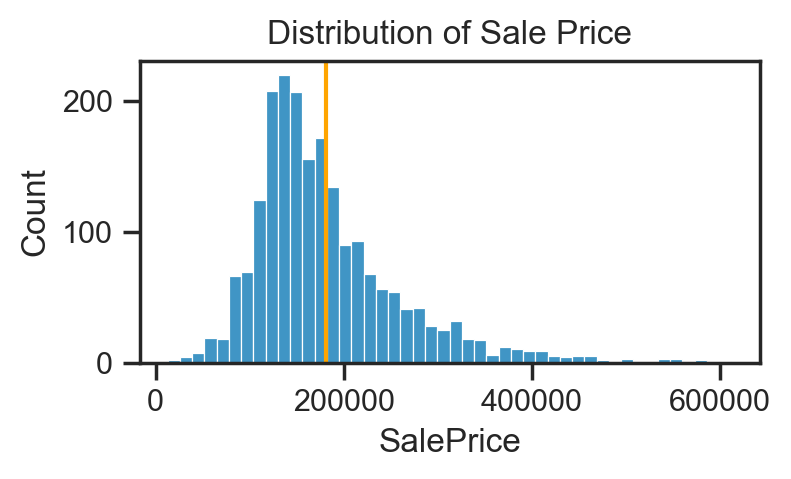

In [49]:
# What are most of our houses selling for? Orange line represents the mean
plt.figure(figsize=(4,2))
sns.histplot(data=ames['SalePrice'])
plt.title('Distribution of Sale Price')
plt.axvline(ames_raw['SalePrice'].mean(),color='orange');

#### Quality

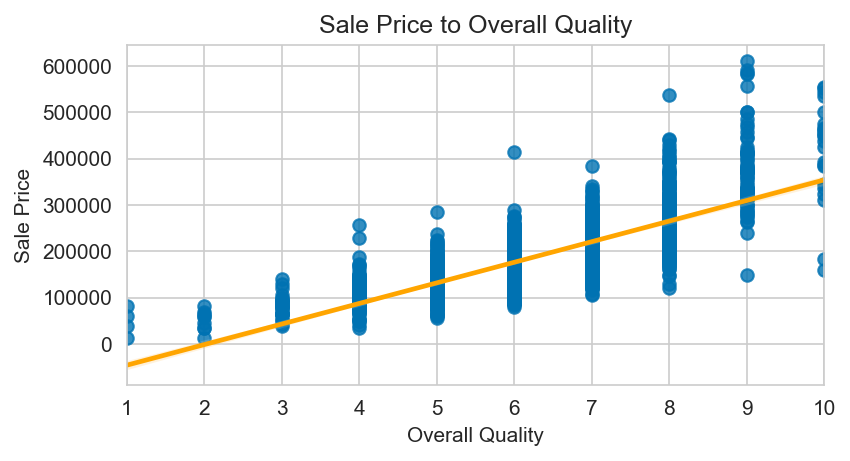

In [16]:
plt.figure(figsize=(6,3))
sns.regplot(data=ames,x='Overall Qual',y='SalePrice',line_kws={'color':'orange'})
plt.title('Sale Price to Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price');

#### Size

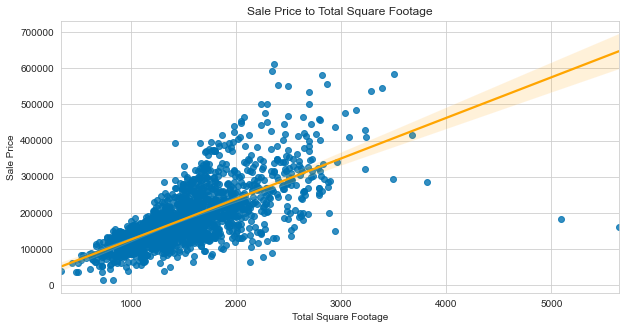

In [6]:
plt.figure(figsize=(10,5))
sns.regplot(data=ames,x='total_SF',y='SalePrice',line_kws={'color':'orange'})
plt.title('Sale Price to Total Square Footage')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price');

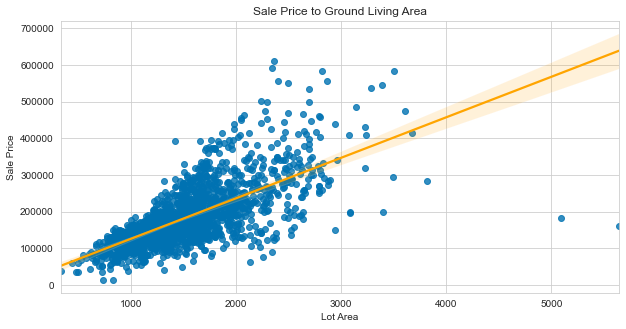

In [7]:
plt.figure(figsize=(10,5))
sns.regplot(data=ames, x='Gr Liv Area',y='SalePrice',line_kws={'color':'orange'})
plt.title('Sale Price to Ground Living Area')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price');

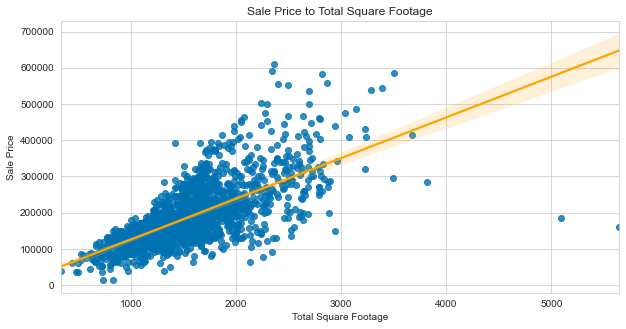

In [8]:
plt.figure(figsize=(10,5))
sns.regplot(data=ames,x='total_SF',y='SalePrice',line_kws={'color':'orange'})
plt.title('Sale Price to Total Square Footage')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price');

From our scatterplots we can see a clear positive correlation between both quality and condition and 'size' of the house. These will be two good variables, to throw into a linear regression model because of this relationship.

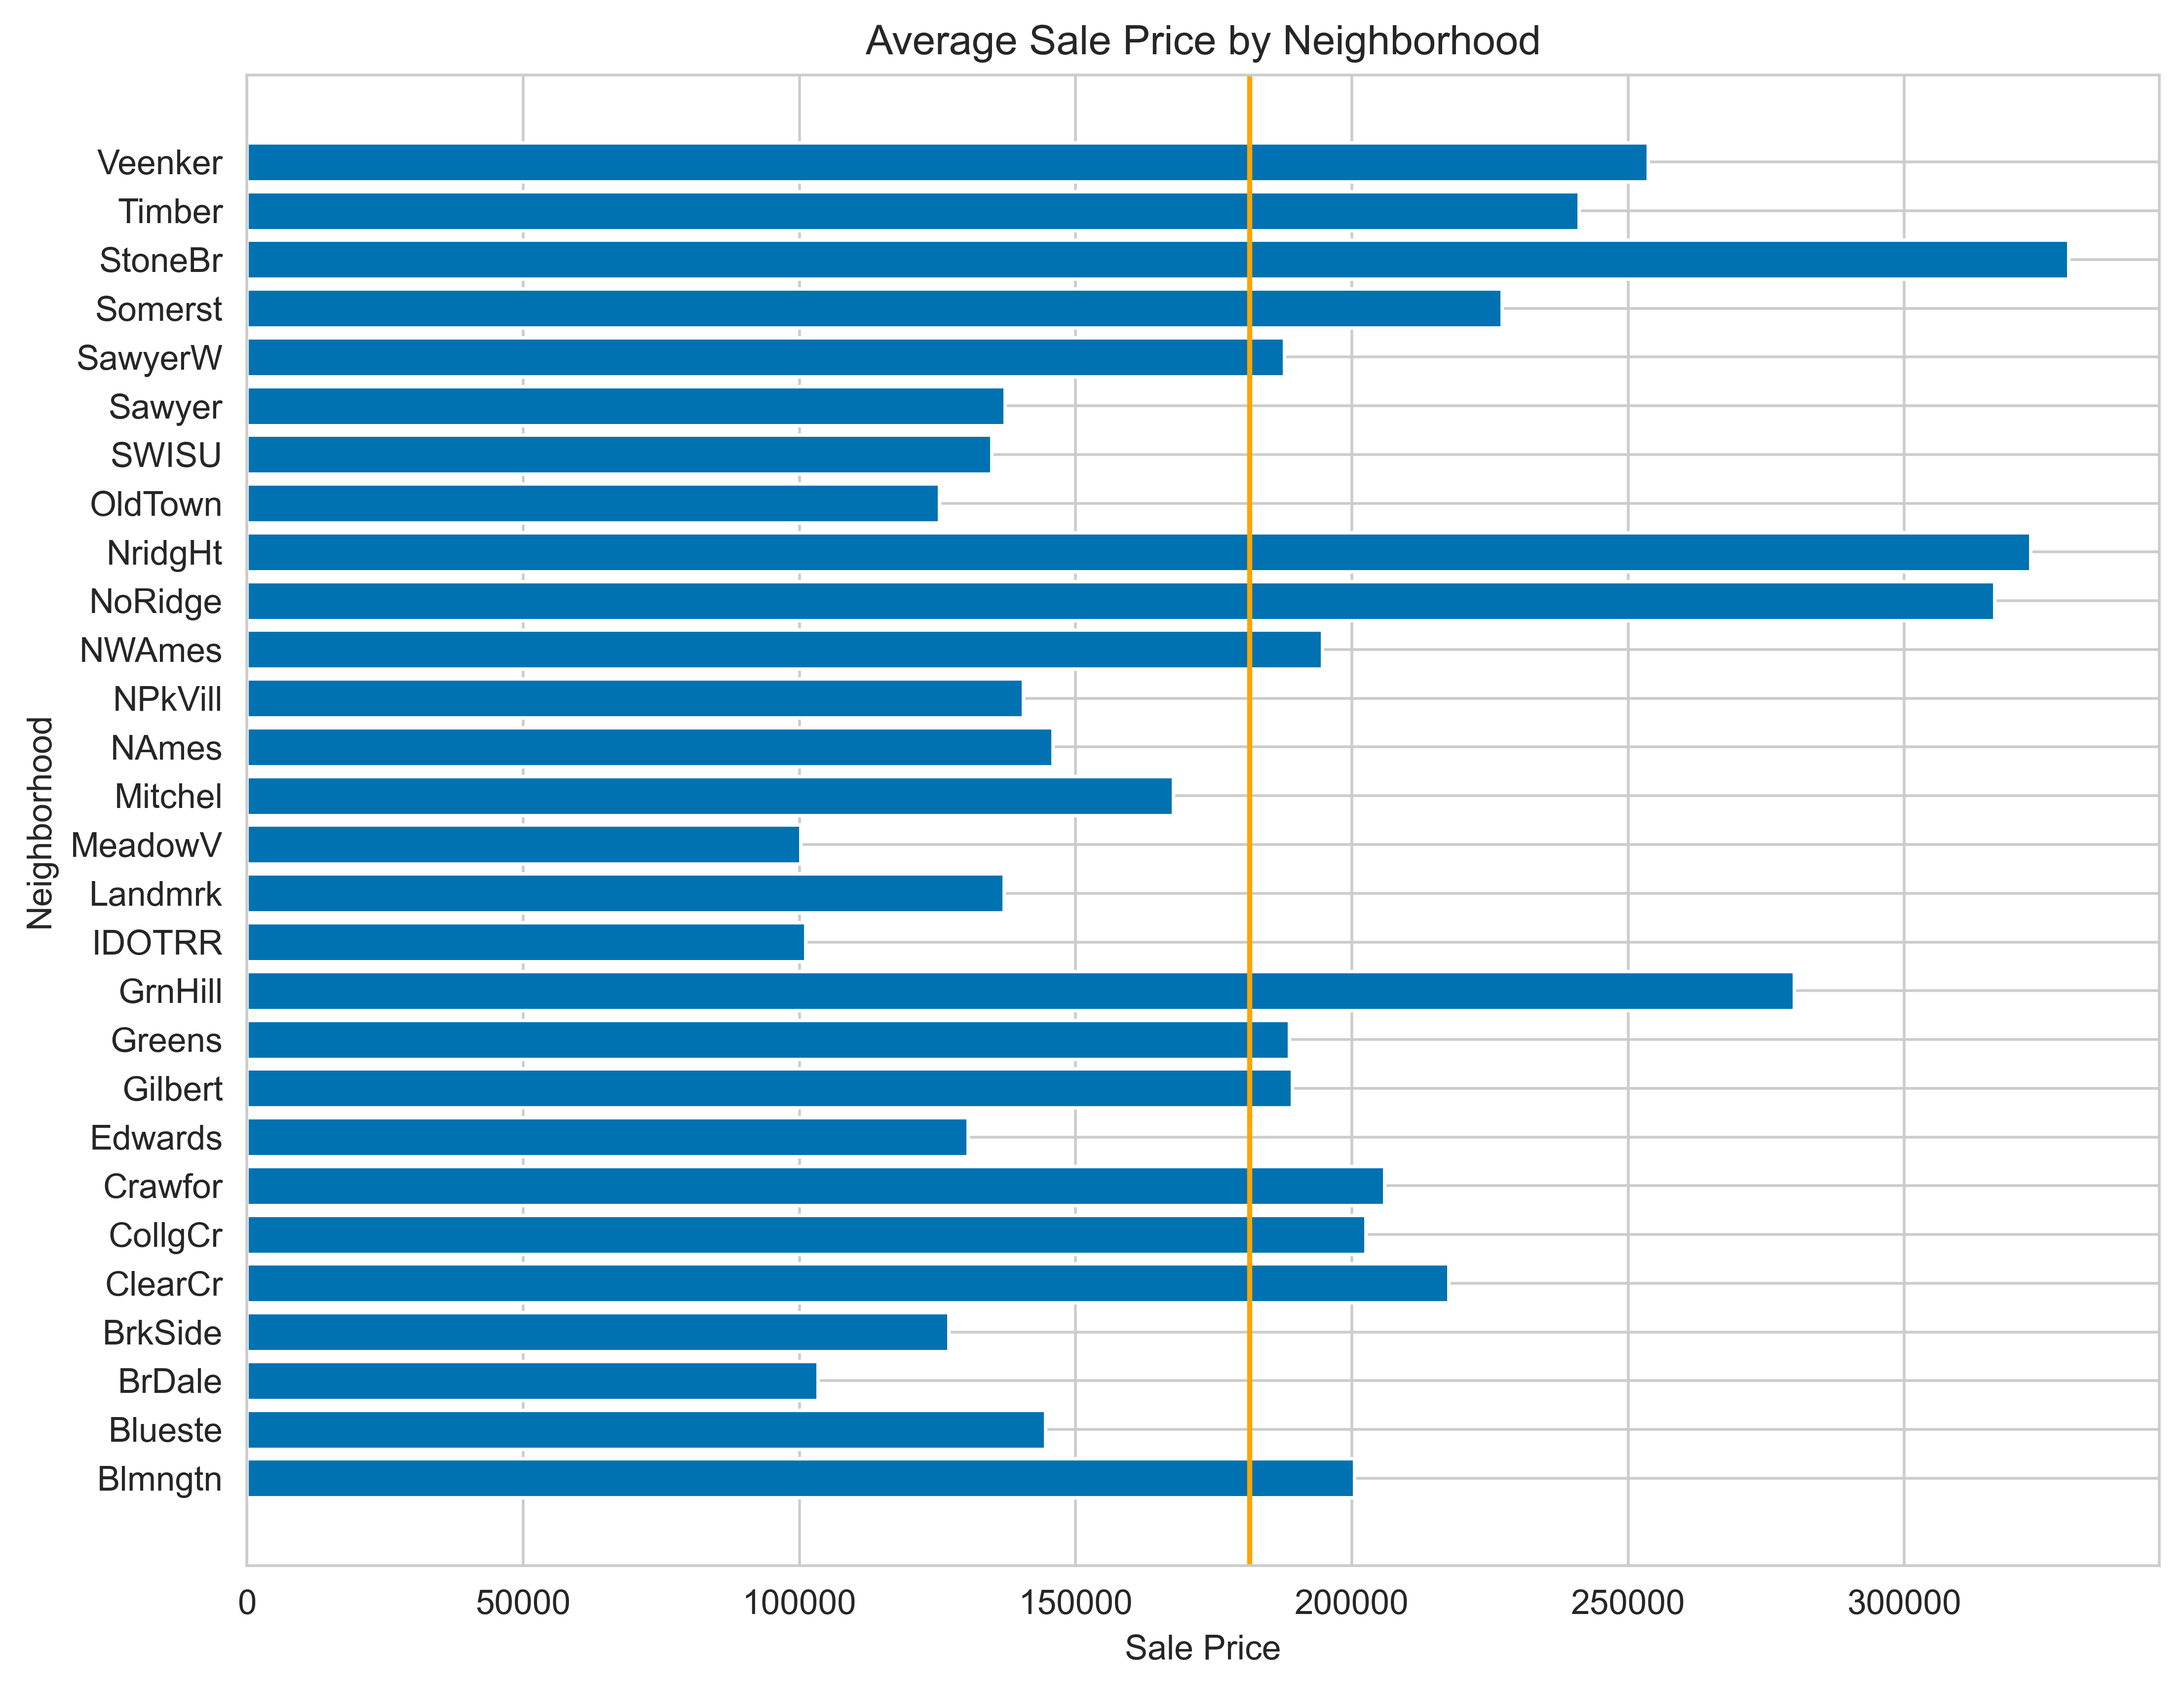

In [21]:
x = ames_raw.groupby('Neighborhood')['SalePrice'].mean()
plt.figure(figsize=(10,8))
plt.barh(x.keys(), x.values)
plt.title('Average Sale Price by Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Sale Price')
plt.axvline(ames_raw['SalePrice'].mean(),color='orange');